In [337]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [338]:
df_all = pd.read_csv('../Processed Data/AllPlayerDataProcessed.csv').drop(columns=['Index'])
df_gk = pd.read_csv('../Processed Data/GKDataProcessed.csv').drop(columns=['Index'])
df_bk = pd.read_csv('../Processed Data/BKDataProcessed.csv').drop(columns=['Index'])
df_md = pd.read_csv('../Processed Data/MDDataProcessed.csv').drop(columns=['Index'])
df_fwd = pd.read_csv('../Processed Data/FWDDataProcessed.csv').drop(columns=['Index'])
# df = df_all
# df.head()

In [339]:
# Shape of dataframe
# print(" Shape of dataframe: ", df.shape)
# Variable inspection
# print("Names of columns ", list(df.columns))

In [340]:
# Training the linear regression model for goalkeepers
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_gk.Overall
df_gk = df_gk.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test_gk = train_test_split(df_gk, target, test_size=0.2)

# Model for goalkeepers
GKmodel = LinearRegression()
GKmodel.fit(X_train, y_train)
predictions_gk = GKmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test_gk, predictions_gk)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test_gk, predictions_gk))))

r2 score: 0.9980364990857881
RMSE : 0.3292486037420973


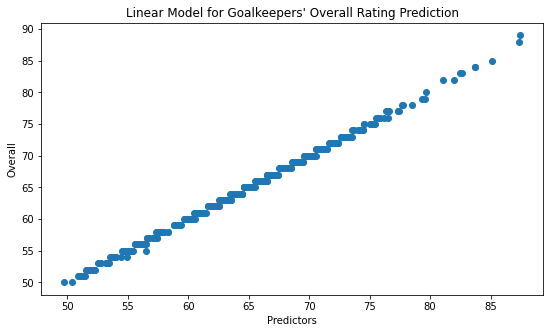

In [341]:
plt.figure(figsize=(9,5))
plt.scatter(predictions_gk, y_test_gk)
plt.xlabel("Predictors")
plt.ylabel('Overall')
plt.title("Linear Model for Goalkeepers' Overall Rating Prediction")
plt.show()

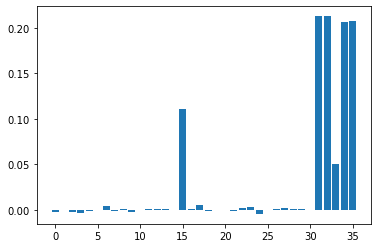

In [342]:
Y = GKmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_gk), Y))
# print(coefs_attr)

In [343]:
# Training the linear regression model for backfielders
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_bk.Overall
df_bk = df_bk.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test_bk = train_test_split(df_bk, target, test_size=0.2)

# Model for midfielders
BKmodel = LinearRegression()
BKmodel.fit(X_train, y_train)
predictions_bk = BKmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test_bk, predictions_bk)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test_bk, predictions_bk))))

r2 score: 0.9585009449262827
RMSE : 1.267198223815481


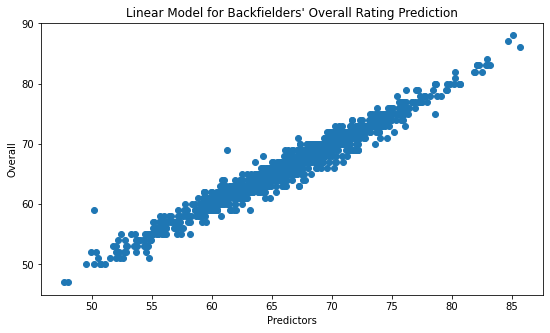

In [344]:
plt.figure(figsize=(9,5))
plt.scatter(predictions_bk, y_test_bk)
plt.xlabel("Predictors")
plt.ylabel('Overall')
plt.title("Linear Model for Backfielders' Overall Rating Prediction")
plt.show()

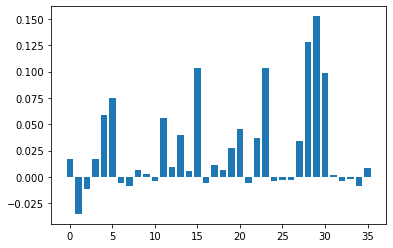

In [345]:
Y = BKmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_bk), Y))
# print(coefs_attr)

In [346]:
# Training the linear regression model for midfielders
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_md.Overall
df_md = df_md.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test_md = train_test_split(df_md, target, test_size=0.2)

# Model for midfielders
MDmodel = LinearRegression()
MDmodel.fit(X_train, y_train)
predictions_md = MDmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test_md, predictions_md)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test_md, predictions_md))))

r2 score: 0.9308637007011945
RMSE : 1.7836410016998332


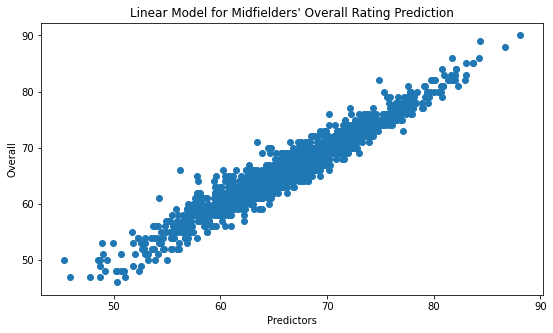

In [347]:
plt.figure(figsize=(9,5))
plt.scatter(predictions_md, y_test_md)
plt.xlabel("Predictors")
plt.ylabel('Overall')
plt.title("Linear Model for Midfielders' Overall Rating Prediction")
plt.show()

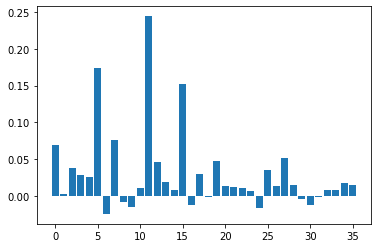

In [348]:
Y = MDmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_md), Y))
# print(coefs_attr)

In [349]:
# Training the linear regression model for strikers / forwards
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_fwd.Overall
df_fwd = df_fwd.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test_fwd = train_test_split(df_fwd, target, test_size=0.2)

# Model for strikers
FWDmodel = LinearRegression()
FWDmodel.fit(X_train, y_train)
predictions_fwd = FWDmodel.predict(X_test)

# Model performance
print('r2 score: '+str(r2_score(y_test_fwd, predictions_fwd)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test_fwd, predictions_fwd))))

r2 score: 0.990936181987586
RMSE : 0.682719193199465


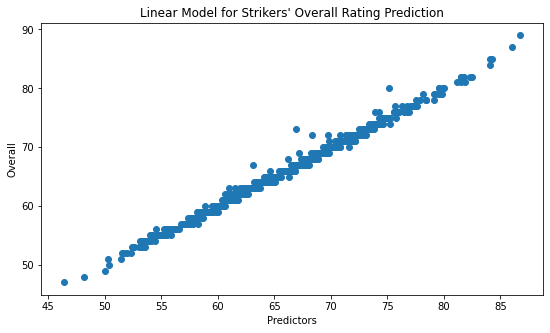

In [350]:
plt.figure(figsize=(9,5))
plt.scatter(predictions_fwd, y_test_fwd)
plt.xlabel("Predictors")
plt.ylabel('Overall')
plt.title("Linear Model for Strikers' Overall Rating Prediction")
plt.show()

{'Age': -0.007328313642156477, 'Weak Foot': -0.008068447600841855, 'Crossing': -0.00042444172585596497, 'Finishing': 0.1679501220316045, 'HeadingAccuracy': 0.0670222411026672, 'ShortPassing': 0.05911989563849585, 'Volleys': 0.010215152016848965, 'Dribbling': 0.07383720710659805, 'Curve': 0.00030790404714583467, 'FKAccuracy': 0.0016190468217839094, 'LongPassing': 0.0031531598168105133, 'BallControl': 0.1265355401743957, 'Acceleration': 0.03977229324396819, 'SprintSpeed': 0.04382638219594387, 'Agility': -0.002994812134968614, 'Reactions': 0.08927613149368008, 'Balance': -0.002405067563882197, 'ShotPower': 0.09485179312715757, 'Jumping': -0.0018683774106563425, 'Stamina': 0.0008648103541634624, 'Strength': 0.04564956301927782, 'LongShots': 0.033010478111780754, 'Aggression': 0.003559867809426299, 'Interceptions': -0.0027975396729488064, 'Positioning': 0.13471727894922686, 'Vision': 0.007088685841683454, 'Penalties': 0.0010090815423109314, 'Composure': 0.00844397985663908, 'Marking': 0.005

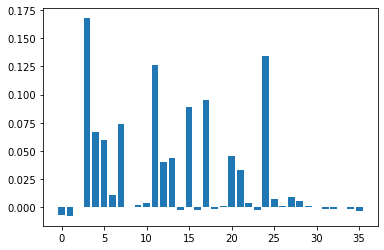

In [351]:
Y = FWDmodel.coef_
X = range(len(Y))
plt.bar(X,Y)
coefs_attr = dict(zip(list(df_fwd), Y))
print(coefs_attr)

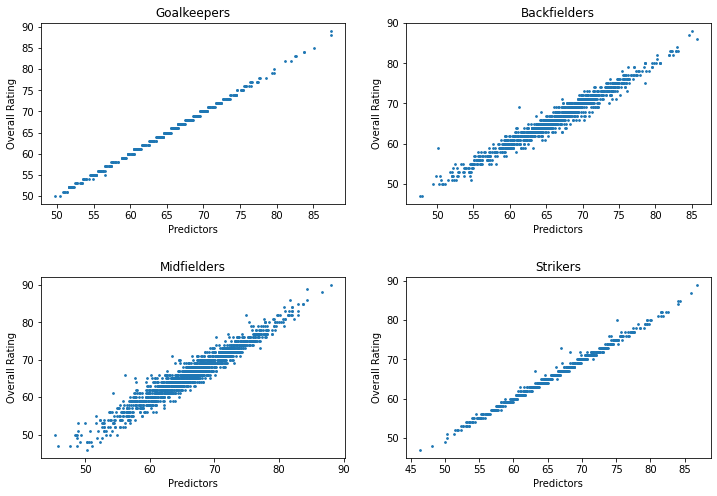

In [352]:
# Plotting each results
figs = plt.figure(figsize=(12,8))
fig_gk = figs.add_subplot(2,2,1)
fig_gk.scatter(predictions_gk, y_test_gk, s = 3)
fig_gk.set_title("Goalkeepers")
fig_gk.set_xlabel("Predictors")
fig_gk.set_ylabel("Overall Rating")
fig_bk = figs.add_subplot(2,2,2)
fig_bk.scatter(predictions_bk, y_test_bk, s = 3)
fig_bk.set_title("Backfielders")
fig_bk.set_xlabel("Predictors")
fig_bk.set_ylabel("Overall Rating")
fig_md = figs.add_subplot(2,2,3)
fig_md.scatter(predictions_md, y_test_md, s = 3)
fig_md.set_title("Midfielders")
fig_md.set_xlabel("Predictors")
fig_md.set_ylabel("Overall Rating")
fig_fwd = figs.add_subplot(2,2,4)
fig_fwd.scatter(predictions_fwd, y_test_fwd, s = 3)
fig_fwd.set_title("Strikers")
fig_fwd.set_xlabel("Predictors")
fig_fwd.set_ylabel("Overall Rating")
figs.subplots_adjust(hspace=0.4)
figs.show()